https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5    

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://methods.sagepub.com/base/download/DatasetHowToGuide/latent-dirichlet-allocation-in-news-2016-python

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

text_fao = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/FAO/FAO_result.pdf")



In [4]:
text_fao.lower()

'food security \n and nutrition \nin the world\nthe state of \nsafeguarding against \neconomic slowdowns \n and downturnsdemocratic republic of the congo.\n young woman selling fruit at a street market.\ncover photograph\n ©shutterstock/valeriya anufriyeva\nthis flagship publication is part of \nthe state of the world\n series of the food and agriculture organization of \nthe united nations.\nrequired citation:\nfao, ifad, unicef, wfp and who. 2019. \nthe state of food security and nutrition in the world 2019\n.  safeguarding against economic slowdowns and downturns\n. rome, fao.\nlicence: cc by-nc-sa 3.0 igo.\nthe designations employed and the presentation of material in this information product do not imply the expression of any \nopinion whatsoever on the part of the food and agriculture organization of the united nations (fao), the international \nfund for agricultural development (ifad), the united nations children™s fund (unicef), the world food programme \n(wfp) or the world hea

In [5]:
type(text_fao)

str

In [6]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [7]:
type(text_fao)

str

In [9]:
Sent = nltk.word_tokenize(text_fao)
print(nltk.pos_tag(Sent))

[('FOOD', 'NNP'), ('SECURITY', 'NNP'), ('AND', 'NNP'), ('NUTRITION', 'NNP'), ('IN', 'NNP'), ('THE', 'NNP'), ('WORLD', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'NNP'), ('SAFEGUARDING', 'NNP'), ('AGAINST', 'NNP'), ('ECONOMIC', 'NNP'), ('SLOWDOWNS', 'NNP'), ('AND', 'NNP'), ('DOWNTURNSDEMOCRATIC', 'NNP'), ('REPUBLIC', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGO', 'NNP'), ('.', '.'), ('Young', 'NNP'), ('woman', 'NN'), ('selling', 'VBG'), ('fruit', 'NN'), ('at', 'IN'), ('a', 'DT'), ('street', 'NN'), ('market', 'NN'), ('.', '.'), ('COVER', 'NNP'), ('PHOTOGRAPH', 'NNP'), ('©Shutterstock/Valeriya', 'NNP'), ('Anufriyeva', 'NNP'), ('This', 'DT'), ('flagship', 'NN'), ('publication', 'NN'), ('is', 'VBZ'), ('part', 'NN'), ('of', 'IN'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('WORLD', 'NNP'), ('series', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Food', 'NNP'), ('and', 'CC'), ('Agriculture', 'NNP'), ('Organization', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('United', 'NNP'), 

In [10]:
sent1 = nltk.pos_tag(Sent)

In [11]:
sent1[:30]

[('FOOD', 'NNP'),
 ('SECURITY', 'NNP'),
 ('AND', 'NNP'),
 ('NUTRITION', 'NNP'),
 ('IN', 'NNP'),
 ('THE', 'NNP'),
 ('WORLD', 'NNP'),
 ('THE', 'NNP'),
 ('STATE', 'NNP'),
 ('OF', 'NNP'),
 ('SAFEGUARDING', 'NNP'),
 ('AGAINST', 'NNP'),
 ('ECONOMIC', 'NNP'),
 ('SLOWDOWNS', 'NNP'),
 ('AND', 'NNP'),
 ('DOWNTURNSDEMOCRATIC', 'NNP'),
 ('REPUBLIC', 'NNP'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('CONGO', 'NNP'),
 ('.', '.'),
 ('Young', 'NNP'),
 ('woman', 'NN'),
 ('selling', 'VBG'),
 ('fruit', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('street', 'NN'),
 ('market', 'NN'),
 ('.', '.')]

In [12]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [13]:
nouns

['woman',
 'fruit',
 'street',
 'market',
 'flagship',
 'publication',
 'part',
 'series',
 'citation',
 'slowdowns',
 'downturns',
 'Licence',
 'designations',
 'presentation',
 'material',
 'information',
 'product',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'development',
 'status',
 'country',
 'territory',
 'city',
 'area',
 'authorities',
 'delimitation',
 'frontiers',
 'boundaries',
 'mention',
 'companies',
 'products',
 'manufacturers',
 'preference',
 'others',
 'nature',
 'designations',
 'presentation',
 'material',
 'maps',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'status',
 'country',
 'territory',
 'sea',
 'area',
 'delimitation',
 'frontiers',
 'precautions',
 'information',
 'publication',
 'material',
 'warranty',
 'kind',
 'responsibility',
 'interpretation',
 'use',
 'material',
 'reader',
 'event',
 'damages',
 'use',
 'rights',
 'work',
 'licence',
 'https',
 'terms',
 'licence',
 'work',
 'purposes',
 'work',
 'use',
 'work',
 'suggestion',
 

In [14]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdowns', 'downturns', 'Licence', 'designations', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authorities', 'delimitation', 'frontiers', 'boundaries', 'mention', 'companies', 'products', 'manufacturers', 'preference', 'others', 'nature', 'designations', 'presentation', 'material', 'maps', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontiers', 'precautions', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damages', 'use', 'rights', 'work', 'licence', 'terms', 'licence', 'work', 'purposes', 'work', 'use', 'work', 'suggestion', 'organization', 'products', 'services', 'use', 'logo', 'work', 'licence', 'translation',

In [15]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdowns downturns Licence designations presentation material information product expression opinion whatsoever part development status country territory city area authorities delimitation frontiers boundaries mention companies products manufacturers preference others nature designations presentation material maps expression opinion whatsoever part status country territory sea area delimitation frontiers precautions information publication material warranty kind responsibility interpretation use material reader event damages use rights work licence terms licence work purposes work use work suggestion organization products services use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation disputes licence accordance present force materials Users material work party tables figures images permission reuse permission copyright holder risk claims infr

In [16]:
type(listToStr)

str

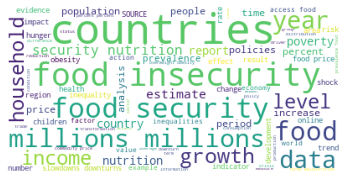

In [17]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(listToStr))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [18]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None,ngram_range=(2,3))
tf = tf_vectorizer.fit_transform(tokens_without_sw)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00 50,00 50 11230position,00 80,00 80 10,01 05,01 05 pdf,01 08,01 51,01 51 00,02 52,...,ł0 2n yemen,ł0 40,ł0 40 179,ł0 60,ł0 60 2haitiłłłlow,ł0 90,ł0 90 3zimbabwełłcurrency,ł1 40,ł4 41,ł4 41 7sudanłłłdownturn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokens_without_sw)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [20]:
df_ngram.head(10)

,frequency,bigram/trigram
0,28,commodity export
1,25,regions subregions
2,23,commodity import
3,19,food insecurity
4,18,worldbank org
5,15,un org
6,13,subregions countriesprevalence
7,13,regions subregions countriesprevalence
8,12,subregions countriesnumber
9,12,regions subregions countriesnumber


In [21]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [22]:
df_ngram

,frequency,bigram/trigram,polarity,subjective
0,28,commodity export,0.0,0.0
1,25,regions subregions,0.0,0.0
2,23,commodity import,0.0,0.0
3,19,food insecurity,0.0,0.0
4,18,worldbank org,0.0,0.0
...,...,...,...,...
1003,1,01 05,0.0,0.0
1004,1,00 80 10,0.0,0.0
1005,1,00 80,0.0,0.0
1006,1,00 50 11230position,0.0,0.0


In [23]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
regions subregions countriesnumber subregions countriesnumber regions subregions who int sub saharan for age apps who who int gho apps who int int gho
Topic 1:
commodity export regions subregions regions subregions countriesprevalence subregions countriesprevalence topic nutrition org topic nutrition org topic data unicef meta analysis mod sev
Topic 2:
commodity import food insecurity well being worldbank org un org org unsd un org unsd unstats un unstats un org org unsd snaama


In [24]:
import pyLDAvis.sklearn


In [25]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  37.878150
2     -1209.665405  212.164124       2        1  32.601285
1     -1437.453247 -586.322510       3        1  29.520565, topic_info=     Category       Freq                                    Term      Total  \
425   Default  17.000000                        commodity export  17.000000   
428   Default  14.000000                        commodity import  14.000000   
587   Default  12.000000                         food insecurity  12.000000   
1013  Default   9.000000                              well being   9.000000   
885   Default   8.000000  regions subregions countriesprevalence   8.000000   
...       ...        ...                                     ...        ...   
30     Topic3   1.373776                                 0913 51   1.790182   
203    Topic3   1.373776                               3841 7857   1.790182   
164    Topic3   1.373776                          2800 1807 6814   1.790182   
883    Topic3   7.922845                      regions subregions  15.983097   
1025   Topic3   2.484608                           worldbank org  11.443458   

      loglift  logprob  
425   30.0000  30.0000  
428   29.0000  29.0000  
587   28.0000  28.0000  
1013  27.0000  27.0000  
885   26.0000  26.0000  
...       ...      ...  
30     0.9553  -5.9142  
203    0.9553  -5.9142  
164    0.9553  -5.9142  
883    0.5183  -4.1620  
1025  -0.3072  -5.3216  

[135 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
22        2  0.548521       044 5n
30        3  0.558603      0913 51
116       3  0.558603    1807 6814
118       3  0.558603    1879 0913
163       3  0.558603    2800 1807
...     ...       ...          ...
1040      2  0.648525      www fao
1041      1  0.359659  www fao org
1041      2  0.539488  www fao org
1052      1  0.784530      www who
1053      1  0.784530  www who int

[117 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])